# NumPy Demo
## PyIU Advanced Python Workshop

Author: 

Last modified: 4/17/2025

This notebook covers some of the basic mechanics of working with numpy arrays.

In [1]:
import numpy as np

In [2]:
test_list = [1, 2, 3, 4]

Often in research, you want to do the same operations on many data points at one time. A common way to store these data would be in a list.

If you wanted to multiply all the values in the list, however, it wouldn't work. Multiplying a list will just repeat the list a number of times.

In [3]:
print(test_list)
print(test_list * 2)

[1, 2, 3, 4]
[1, 2, 3, 4, 1, 2, 3, 4]


This is where arrays come in. There are many advantages to using numpy arrays instead of lists. We will start with math operations.

One way to create an array is to turn a list into an array.

In [4]:
list2array = np.asarray(test_list)
print(list2array)
print(list2array * 2)

[1 2 3 4]
[2 4 6 8]


We can also create an array of random values.

In [5]:
random_array = np.random.rand(1, 4)
print(random_array)

[[0.29074501 0.99591824 0.6744953  0.62230744]]


In [6]:
rand_arr2 = np.random.randint(0,3,4)
print(rand_arr2)

[0 2 0 0]


np.randint goes from the lower value to one before the higher value. Using the example given above, you can get values from 0 (the lower value) to 2 (one before the higher value, 3). This is a bit confusing, but it is consistent with how python uses indices. Python is a 0-indexed language.

In [7]:
print(list2array)
print(list2array[0])
print(list2array[1])
print(list2array[2])
print(list2array[3])

[1 2 3 4]
1
2
3
4


In [8]:
#print(list2array[4])

In [9]:
print(list2array[0:2])
print(list2array[:2])

[1 2]
[1 2]


Even though 4 is not an index of the array, it reads it as a higher bound. Like np.random.randint, it considers the integer before the input number. So even though it doesn't make a lot of sense, there is an internal logic to it.

You can also just say to take from a value to the end by using a ":" with no number after.

In [10]:
print(list2array[2:4])
print(list2array[2:])

[3 4]
[3 4]


In [11]:
print(list2array[1:3])

[2 3]


Let's say you were curious what the final value in the array was. Maybe you are looking at distances to stars and you want to know what the last one recorded was.

You can use negative indices to look at the ends of arrays.

In [12]:
print(list2array[-1])

4


Similarly, you can use negative indices to look at chunks (slices) of the arrays. Say you wanted the last two itmes of an array:

In [13]:
print(list2array[-2:])

[3 4]


We can also save slices of arrays for later use.

In [14]:
array_end = list2array[-2:]
print(array_end)

[3 4]


Now let's say that we want to look at distances to stars and we want to find the furthest one. We will use arbitrary units. The important thing to consider here is that a higher number is a larger distance.

In [15]:
star_dist = np.random.rand(10)
print(star_dist)

[0.70074595 0.18020306 0.4433927  0.46898905 0.5740019  0.80450002
 0.3203275  0.38640046 0.145514   0.36097912]


There are a few ways to determine the furthest point. It might be helpful for later to have the stars in order of distance. We can easily sort the array to put it in order of increasing distance.

In [16]:
sorted_distance = np.sort(star_dist)
print(sorted_distance)
print(sorted_distance[-1])
print("Furthest star distance = " + str(sorted_distance[-1]))

[0.145514   0.18020306 0.3203275  0.36097912 0.38640046 0.4433927
 0.46898905 0.5740019  0.70074595 0.80450002]
0.8045000211021825
Furthest star distance = 0.8045000211021825


There is a more direct method if we are just interested in the largest distance, however.

In [17]:
print(np.max(star_dist))


0.8045000211021825


We can also use a similar method to find the smallest.

In [18]:
print(np.min(star_dist))

0.14551399726323355


We can also choose only values that meet certain criteria. Say we only wanted values that are above a distance of 0.5 (in our arbitrary units). Or values that are only below 0.5.

In [19]:
print(sorted_distance[sorted_distance > 0.5])
print(sorted_distance[sorted_distance < 0.5])
print(sorted_distance[(sorted_distance > 0.5) & (sorted_distance < 0.75)])

[0.5740019  0.70074595 0.80450002]
[0.145514   0.18020306 0.3203275  0.36097912 0.38640046 0.4433927
 0.46898905]
[0.5740019  0.70074595]


It is important to use "&" instead of "and" when doing multiple conditions as we showed above. It is also important to put each condition in parentheses. Ex (sorted_distance > 0.5)

In [20]:
indices = np.where(sorted_distance > 0.5)
print(np.where(sorted_distance > 0.5))

(array([7, 8, 9], dtype=int64),)


In [21]:
sorted_distance[indices]

array([0.5740019 , 0.70074595, 0.80450002])

You can also have multidimensional arrays. There are many uses for them and they behave very similarly to one dimensional arrays. There is a slight difference in how you get information out of them, however.

In [22]:
array3d = np.random.rand(4,3)
print(array3d)

[[0.25987414 0.32734164 0.71445615]
 [0.76724487 0.37625425 0.62936939]
 [0.6396576  0.53978417 0.84700974]
 [0.60580871 0.22743419 0.77712739]]


Let's say these are cartesian coordinates for four stars. The first column is the x values, the second column is the y values, and the third column is the z values. The way we get the information out is a bit different.

In [23]:
print("The first index gets us: " + str(array3d[0]))

The first index gets us: [0.25987414 0.32734164 0.71445615]


In [24]:
print(array3d[0][0])

0.2598741386640223


In [25]:
print("The first column (the x positions) is: " + str(array3d[:,0]))

The first column (the x positions) is: [0.25987414 0.76724487 0.6396576  0.60580871]


You can tell a multidimensional array to get the first column by using ":,". [:,0] will get the first column, [:,1] will get the second, and so on.

From that point, the array acts in the same way as we have shown before.

In [26]:
print("The x position of the first star is: " + str(array3d[:,0][0]))

The x position of the first star is: 0.2598741386640223


Arrays are also incredibly useful when doing math. As I mentioned at the beginning, you can't multiply a list by a number. Math operations do work on arrays, however.

If you multiply an array by a number, it will multiply each value in the array by that number. The same is true for any other math operation.

In [27]:
print(list2array)
print(list2array * 2)
print(list2array - 10)
print(list2array + 3)
print(list2array / 4)
print(list2array ** 2)
print(np.sqrt(list2array))

[1 2 3 4]
[2 4 6 8]
[-9 -8 -7 -6]
[4 5 6 7]
[0.25 0.5  0.75 1.  ]
[ 1  4  9 16]
[1.         1.41421356 1.73205081 2.        ]


Let's say we want to take our cartesian coordiantes (XYZ) and turn them into a single distance (R).

We can use a simple function to do this for future use too. Arrays can be fed into a function the same way a single number could be.

In [28]:
def radius(xyz):
    x = xyz[:,0]
    y = xyz[:,1]
    z = xyz[:,2]

    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)

    return(r)

In [29]:
print(array3d)

[[0.25987414 0.32734164 0.71445615]
 [0.76724487 0.37625425 0.62936939]
 [0.6396576  0.53978417 0.84700974]
 [0.60580871 0.22743419 0.77712739]]


In [30]:
r_dist = radius(array3d)
print(r_dist)

print(np.sort(r_dist))

[0.82772864 1.06129062 1.19077886 1.01126529]
[0.82772864 1.01126529 1.06129062 1.19077886]


Finally, we can edit arrays. If we know how many points we need before starting a process, we can make an array of 0s with the length of the number of points we will have.

For example, if we had 10 stars that we were going to analyze with a function to get their brightness, we could make an array of 0s with 10 spots.

In [31]:
array0 = np.zeros(10)
print(array0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We can then input values into the array once we have them. For now, let's just put in values 0 through 9 into the array using a loop.

In [32]:
for i in range(len(array0)):
    print(i)
    array0[i] = i
print(array0)

0
1
2
3
4
5
6
7
8
9
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The same is true for a multidimensional array. If we need a 2D array, we use () and input the size of the array there.

In [33]:
array0_2d = np.zeros((2,3))
print(array0_2d)

[[0. 0. 0.]
 [0. 0. 0.]]


In [34]:
array0_2d[0][2] = 3
array0_2d[1][0] = 1
print(array0_2d)

[[0. 0. 3.]
 [1. 0. 0.]]


In [35]:
print(array3d[0])
r_arr = np.zeros(len(array3d))
mass = np.asarray([0.5, 1, 1.5, 2])
print(r_arr)
r = []
r_small = []
m_small = []
for i in range(len(array3d)):
  r_temp = np.sqrt(array3d[i][0] ** 2 + array3d[i][1] **2 + array3d[i][2] ** 2)
  if r_temp < 1:
    r_small.append(r_temp)
    m_small.append(mass[i])
  r.append(r_temp)



[0.25987414 0.32734164 0.71445615]
[0. 0. 0. 0.]


In [36]:
print(array3d)
print(array3d[:,0])
r = np.sqrt(array3d[:,0] ** 2 + array3d[:,1] ** 2 + array3d[:,2] ** 2)
print(r)

[[0.25987414 0.32734164 0.71445615]
 [0.76724487 0.37625425 0.62936939]
 [0.6396576  0.53978417 0.84700974]
 [0.60580871 0.22743419 0.77712739]]
[0.25987414 0.76724487 0.6396576  0.60580871]
[0.82772864 1.06129062 1.19077886 1.01126529]


In [37]:
r_small_ind = np.where((r<1) & (mass == 1))
print(r[r_small_ind])
print(mass[r_small_ind])

[]
[]


In [38]:
values = np.loadtxt('snap.dat.0001')

In [39]:
print(values)

[[ 1.00000000e+00  8.42000000e-06 -9.29904940e-01 ...  3.87055310e-01
  -6.51669500e-01  1.44091460e-01]
 [ 2.00000000e+00  2.13700000e-05  2.15483080e-01 ...  4.02249310e-01
   4.55606460e-01 -9.04775400e-02]
 [ 3.00000000e+00  7.46000000e-06 -5.16549890e-01 ... -5.12877700e-01
  -6.14304540e-01 -7.50525400e-02]
 ...
 [ 9.99980000e+04  2.95500000e-05 -3.21275568e+00 ... -1.75248700e-01
   2.58347480e-01  3.49744600e-02]
 [ 9.99990000e+04  1.36800000e-05 -9.34057890e-01 ... -4.57687710e-01
   3.81196470e-01 -8.87105400e-02]
 [ 1.00000000e+05  6.93000000e-06 -4.57345009e+00 ... -1.08548700e-01
   2.87935470e-01  2.38036450e-01]]


In [40]:
FG = values[values[:,0] > 50000]
SG = values[values[:,0] <= 50000]

In [41]:
xyz_FG = FG[:,2:5]
xyz_SG = SG[:,2:5]

In [42]:
from matplotlib import pyplot as plt

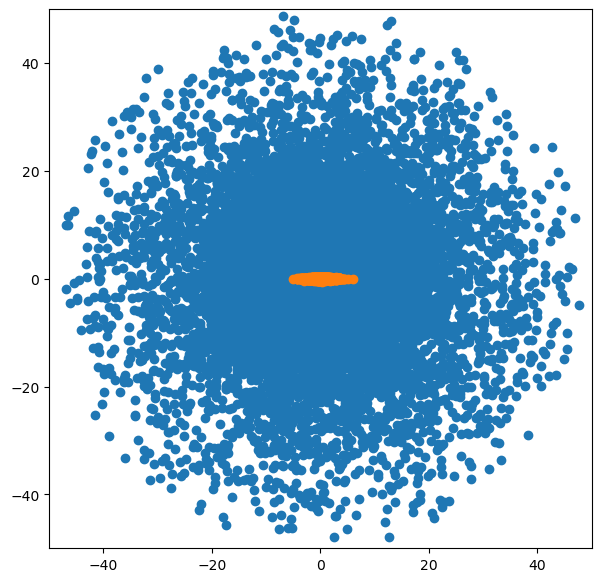

In [43]:
fig, ax = plt.subplots(figsize = (7,7))
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.plot(xyz_FG[:,0], xyz_FG[:,2], 'o')
ax.plot(xyz_SG[:,0], xyz_SG[:,2], 'o')

In [44]:
def rad(x, y, z):
  r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
  return(r)

In [45]:
rad(2, 5,7)

8.831760866327848

In [46]:
rad(array3d[:,0], array3d[:,1], array3d[:,2])

array([0.82772864, 1.06129062, 1.19077886, 1.01126529])